# Assignment  14 Decision Tree - Company Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Data Preprocessing

In [7]:
#Converting target variable in categorical variable

company_data["Sales"] = np.where(company_data['Sales'],'yes','no')

In [8]:
company_data["Sales"]

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
395    yes
396    yes
397    yes
398    yes
399    yes
Name: Sales, Length: 400, dtype: object

In [9]:
# One Hot encoding for the categorical data
company_data1=pd.get_dummies(company_data,columns=['ShelveLoc'])
company_data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,yes,138,73,11,276,120,42,17,Yes,Yes,1,0,0
1,yes,111,48,16,260,83,65,10,Yes,Yes,0,1,0
2,yes,113,35,10,269,80,59,12,Yes,Yes,0,0,1
3,yes,117,100,4,466,97,55,14,Yes,Yes,0,0,1
4,yes,141,64,3,340,128,38,13,Yes,No,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,yes,138,108,17,203,128,33,14,Yes,Yes,0,1,0
396,yes,139,23,3,37,120,55,11,No,Yes,0,0,1
397,yes,162,26,12,368,159,40,18,Yes,Yes,0,0,1
398,yes,100,79,7,284,95,50,12,Yes,Yes,1,0,0


In [10]:
company_data1.Sales.replace(('yes','no'),(1,0),inplace=True)
company_data1.Urban.replace(('Yes','No'),(1,0),inplace=True)
company_data1.US.replace(('Yes','No'),(1,0),inplace=True)
company_data1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,138,73,11,276,120,42,17,1,1,1,0,0
1,1,111,48,16,260,83,65,10,1,1,0,1,0
2,1,113,35,10,269,80,59,12,1,1,0,0,1
3,1,117,100,4,466,97,55,14,1,1,0,0,1
4,1,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,1,0,1,0
396,1,139,23,3,37,120,55,11,0,1,0,0,1
397,1,162,26,12,368,159,40,18,1,1,0,0,1
398,1,100,79,7,284,95,50,12,1,1,1,0,0


In [11]:
company_data1.dtypes

Sales               int64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
Urban               int64
US                  int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
dtype: object

## Model Building

In [12]:
X=pd.concat([company_data1.iloc[:,1:]])
X

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,1,1,0,1,0
396,139,23,3,37,120,55,11,0,1,0,0,1
397,162,26,12,368,159,40,18,1,1,0,0,1
398,100,79,7,284,95,50,12,1,1,1,0,0


In [13]:
Y=company_data1.iloc[:,0]
Y

0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int64

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.20)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 12)
(80, 12)
(320,)
(80,)


## Model Training

In [16]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [17]:
dt_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

## Model Testing

In [18]:
Y_train_pred=dt_model.predict(X_train)
Y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
Y_test_pred=dt_model.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Model Evaluation

In [20]:
# Training Accuracy

print(classification_report(Y_train,Y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00       319

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [21]:
print(confusion_matrix(Y_train,Y_train_pred))

[[  1   0]
 [  0 319]]


1.0


Text(0, 0.5, 'True Positive Rate')

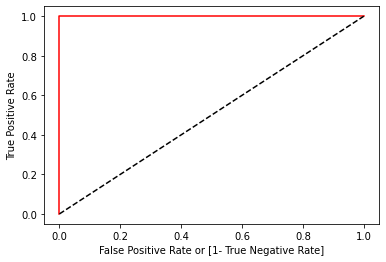

In [22]:
fpr, tpr, threshold= roc_curve(Y,dt_model.predict_proba(X)[:,1])
auc= roc_auc_score(Y_train,Y_train_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='dt model(area=%0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')

## Testing Accuracy

In [23]:
print(classification_report(Y_test,Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [24]:
print(confusion_matrix(Y_test,Y_test_pred))

[[80]]


In [ ]:
fpr, tpr, thresholds = roc_curve(Y,dt_model.predict_proba (X)[:,1])
auc = roc_auc_score(Y_test,Y_test_pred)
print(auc)
plt.plot(fpr, tpr, color='red', label='dt model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

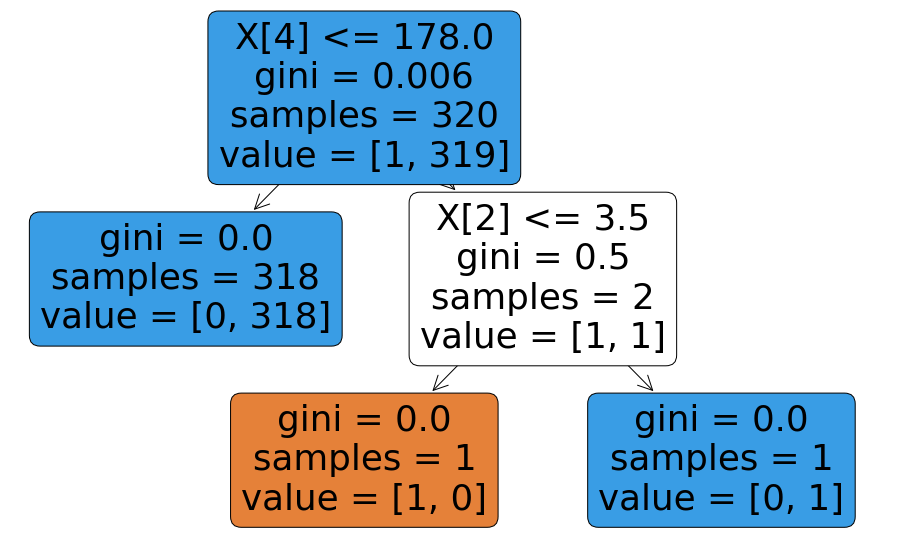

In [26]:
# Apply the decision tree classifier model to the data with a maximum tree depthof 3

model_all_params_max_depth_3=DecisionTreeClassifier(max_depth=3).fit(X_train, Y_train)

# Prepare a plot figure with set size.
plt.figure(figsize=(16,10))

# Plot the decision tree.
plot_tree(model_all_params_max_depth_3, rounded=True, filled=True)

# Diaplay the tree plot figure
plt.show()

In [ ]:
# Training accuracy- 320%

# Testing accuracy- 80%